In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Based on common color blindness
# https://www.nature.com/articles/nmeth.1618/figures/2
# Skip black and reserve it for other specific lines
def color_list():
    l = [
            np.array([230, 159, 0]), # orange
            np.array([86, 180, 233]), # Sky blue
            np.array([0, 158, 115]), # Bluish green
            np.array([240, 228, 66]), # Yellow
            np.array([0, 114, 178]), # Blue
            np.array([213, 94, 0]), # Vermillion
            np.array([204, 121, 167]), # Reddish purple
    ]
    return [i/255. for i in l]

In [38]:

# Flexible load fraction, % of hours operating a full capacity, 
#    % of hours operating between full and zero capacity, % of hours operating a zero capacity
#    Average flexible load capacity factor
vals = {
    0.05 : [
        98.9,
        0.8,
        0.3,
        1.1,
        99.4],
    0.15 : [
        94.7,
        5.0,
        0.3,
        5.3,
        97.7],
    0.30 : [
        69.4,
        30.4,
        0.2,
        30.6,
        90.6],
    0.40 : [
        42.5,
        57.5,
        0.0,
        57.5,
        89.0]
}
labels = ['full capacity', 
        'between full and zero capacity',
        'zero capacity',
        'less than full capacity',
        'average capacity factor (%)']
for k, v in vals.items():
    print(k, v)

0.05 [98.9, 0.8, 0.3, 1.1, 99.4]
0.15 [94.7, 5.0, 0.3, 5.3, 97.7]
0.3 [69.4, 30.4, 0.2, 30.6, 90.6]
0.4 [42.5, 57.5, 0.0, 57.5, 89.0]


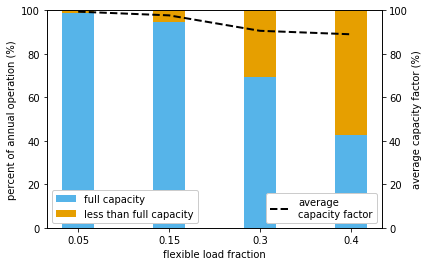

In [39]:
fix, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_ylabel(labels[-1])
N = 4
width = 0.35
colors = color_list()
ind = np.arange(N)
tot = np.zeros(4)
for i in range(5):
    if i == 1 or i == 2:
        continue
    to_plot = []
    for k, v in vals.items():
        to_plot.append(v[i])
    
    if i == 4:
        ax2.plot(to_plot, 'k--', linewidth=2, label='average\ncapacity factor')
    else:
        c = colors[1] if i == 0 else colors[0]
        ax.bar(ind, to_plot, width, color=c, bottom=tot, label=labels[i])
        tot += to_plot
ax.set_ylabel('percent of annual operation (%)')
ax.set_xlabel('flexible load fraction')
ax.set_ylim(0, 100)
ax2.set_ylim(0, 100)
plt.xticks(ind, (vals.keys()))
ax.legend(loc='lower left', framealpha=1)
ax2.legend(loc='lower right', framealpha=1)


ax2.plot()
plt.savefig('electrolysis_operational_capacity.png')